1. Patient Demographics

| Variable | Reason |
|----------|--------|
| AGE / AGEGROUP | Age group is useful for stratification |
| FEMALE | Sex variable |
| RACE | Demographic disparities |
| HISPANIC | Ethnicity |
| ZIPINC_QRTL | Socioeconomic status indicator (income quartile by ZIP) |


In [1]:
# Reading data from a file
import pandas as pd
import numpy as np
df = pd.read_csv('../data/data/hot_encoding_Cancer_pancreas.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.columns = df.columns.str.lower()


FileNotFoundError: [Errno 2] No such file or directory: '../data/data/hot_encoding_Cancer_pancreas.csv'

In [ ]:

del df["race_edit"]
del df["maritalstatus_x"]
del df["hispanic_x"]
del df["asource"] # asource	Patient Source (1=Hospital, 2=Physician, 3=Other)
del df["asource_x"] # asource_x	Patient Source (1=Hospital, 2=Physician, 3=Other)
del df["key"] # key	Patient Key linked to the SEER database
del df["mdnum1_r"] # mdnum1_r	Physician Number (linked to the SEER database)
del df["mdnum2_r"] # mdnum2_r	Physician Number (linked to the SEER database)
del df["zip"] # zip	Patient ZIP Code
del df["zip3"] # zip3	Patient ZIP Code (first three digits)
del df['race_x'] # same as race
del df["pstco"] # pstco	Patient State Code (linked to the SEER database)
del df["pstco2"] # pstco2	Patient State Code (linked to the SEER database)
del df["los_x"]
del df["mdc_nopoa"]
del df["drg_nopoa"]
del df["totchg_x"]
del df["xxx000"]
del df["end010"]
del df["end011"]

# lower case df
df = df.sort_values(['visitlink', 'daystoevent']).drop_duplicates(subset='visitlink', keep='first')
df = df.reset_index(drop=True)
df.value_counts().value_counts()
df.shape

C:\Users\nemat\AppData\Local\Temp\ipykernel_18968\2787836572.py:4: DtypeWarning:

Columns (52,53,54,55,56,102,114,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,170,171,172,177) have mixed types. Specify dtype option on import or set low_memory=False.



(5184, 760)

In [174]:
df["hispanic"].value_counts(dropna=False)

hispanic
0    5018
3     105
1      49
2      11
4       1
Name: count, dtype: int64

In [175]:
marital_map = {
    'M': 'Married',
    'I': 'Single',
    'D': 'Divorced',
    'W': 'Widowed',
    'X': 'Other/Unknown',
    '0': 'Other/Unknown'
}

marital_df = df['maritalstatusub04'].map(marital_map).value_counts().reset_index(name='Count')
marital_df.columns = ['Marital Status', 'Count']


In [176]:
marital_df["Marital Status"]

0          Married
1           Single
2          Widowed
3         Divorced
4    Other/Unknown
Name: Marital Status, dtype: object

In [177]:
import plotly.express as px

fig_marital = px.bar(
    marital_df,
    x='Marital Status',
    y='Count',
    title='Marital Status Distribution (Detailed)',
    text='Count'
)

fig_marital.update_layout(
    template='plotly_white',
    xaxis_tickangle=45,
    height=500,
    width=600
)

fig_marital.show()


In [178]:
# Step 1: Identify columns to keep
demographic_cols = []

# Keep AGE or AGEGROUP
if 'age' in df.columns:
    demographic_cols.append('age')
elif 'agegroup' in df.columns:
    demographic_cols.append('agegroup')

# Keep other demographic variables
for col in ['female', 'race', 'hispanic', 'maritalstatusub04', 'zipinc_qrtl']:
    if col in df.columns:
        demographic_cols.append(col)

# Step 2: Filter dataframe
demographics_df = df[demographic_cols].copy()

# Step 3: Map maritalstatusub04 to integers
marital_map = {
    'M': 1,  # Married
    'I': 2,  # Single
    'D': 3,  # Divorced
    'W': 4,  # Widowed
    'X': 0,  # Other/Unknown
    '0': 0   # Other/Unknown
}

if 'maritalstatusub04' in demographics_df.columns:
    demographics_df['marital_status'] = demographics_df['maritalstatusub04'].map(marital_map)

    # Drop old column
    demographics_df.drop(columns=['maritalstatusub04'], inplace=True)

# Final Check
demographics_df.head()


,age,female,race,hispanic,zipinc_qrtl,marital_status
0,69,-6,6,0,4,1
1,79,0,1,0,3,1
2,67,0,1,0,2,1
3,84,1,1,0,3,4
4,76,1,1,0,2,3


In [179]:
for col in ['female', 'race', 'hispanic', 'marital_status', 'zipinc_qrtl']:
    print(f"\n{col} value counts:")
    print(demographics_df[col].value_counts(dropna=False))



female value counts:
female
 0    2644
 1    2539
-6       1
Name: count, dtype: int64

race value counts:
race
1    3310
2    1415
3     166
4     158
6      90
0      39
5       6
Name: count, dtype: int64

hispanic value counts:
hispanic
0    5018
3     105
1      49
2      11
4       1
Name: count, dtype: int64

marital_status value counts:
marital_status
1    2873
2     960
4     734
3     479
0     138
Name: count, dtype: int64

zipinc_qrtl value counts:
zipinc_qrtl
4    2436
3    1506
2     613
1     562
0      67
Name: count, dtype: int64


In [180]:
demographics_df['female'] = demographics_df['female'].replace({-6: np.nan})
# counting missing values
demographics_df['female'].value_counts(dropna=False)

female
0.0    2644
1.0    2539
NaN       1
Name: count, dtype: int64

In [181]:
demographics_df['marital_status'] = demographics_df['marital_status'].apply(lambda x: 1 if x==1 else 0 if x in [2,3,4] else np.nan)
demographics_df['marital_status'] = demographics_df['marital_status'].fillna(0)
demographics_df['marital_status']

0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
5179    1.0
5180    1.0
5181    0.0
5182    0.0
5183    1.0
Name: marital_status, Length: 5184, dtype: float64

In [182]:
for col in ['female', 'race', 'hispanic', 'marital_status', 'zipinc_qrtl']:
    print(f"\n{col} value counts:")
    print(demographics_df[col].value_counts(dropna=False))



female value counts:
female
0.0    2644
1.0    2539
NaN       1
Name: count, dtype: int64

race value counts:
race
1    3310
2    1415
3     166
4     158
6      90
0      39
5       6
Name: count, dtype: int64

hispanic value counts:
hispanic
0    5018
3     105
1      49
2      11
4       1
Name: count, dtype: int64

marital_status value counts:
marital_status
1.0    2873
0.0    2311
Name: count, dtype: int64

zipinc_qrtl value counts:
zipinc_qrtl
4    2436
3    1506
2     613
1     562
0      67
Name: count, dtype: int64


Demographic Analysis and Visualizations


In [183]:
!pip install plotly

In [184]:
import plotly.express as px
import plotly.graph_objects as go

# Clean age variable
if 'age' in demographics_df.columns:
    demographics_df = demographics_df[demographics_df['age'] >= 0]

# Plot
if 'age' in demographics_df.columns:
    fig = px.histogram(
        demographics_df,
        x='age',
        nbins=30,
        marginal='violin',
        title='Age Distribution of Pancreatic Cancer Patients',
        labels={'age': 'Age'}
    )
else:
    age_count = demographics_df['agegroup'].value_counts().sort_index()
    fig = go.Figure(
        data=[
            go.Bar(
                x=age_count.index,
                y=age_count.values
            )
        ]
    )
    fig.update_layout(
        title='Age Group Distribution of Pancreatic Cancer Patients',
        xaxis_title='Age Group',
        yaxis_title='Count'
    )

fig.update_yaxes(range=[0, None])
fig.update_layout(template='plotly_white', height=500   ,  width=600
)
fig.show()

demographics_df

,age,female,race,hispanic,zipinc_qrtl,marital_status
0,69,NaN,6,0,4,1.0
1,79,0.0,1,0,3,1.0
2,67,0.0,1,0,2,1.0
3,84,1.0,1,0,3,0.0
4,76,1.0,1,0,2,0.0
...,...,...,...,...,...,...
5179,78,0.0,1,0,2,1.0
5180,72,0.0,1,0,4,1.0
5181,70,1.0,1,0,4,0.0
5182,74,1.0,1,0,4,0.0


# Age distribution visualization

In [185]:
demographics_df['age'].value_counts()

age
70     205
68     190
69     180
65     174
74     173
      ... 
100      1
28       1
27       1
31       1
12       1
Name: count, Length: 79, dtype: int64

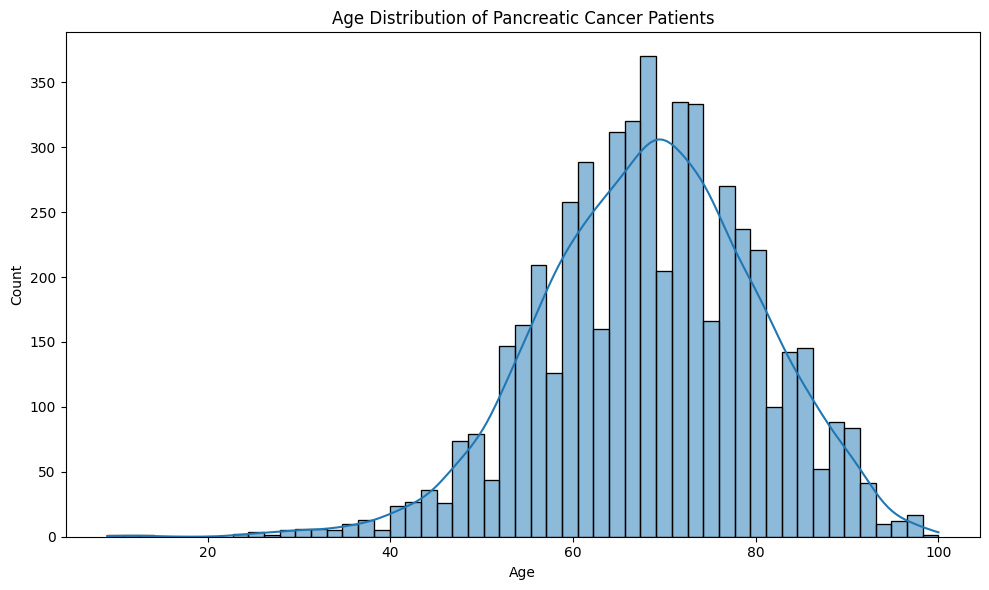

In [186]:
# Age distribution visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
if 'age' in demographics_df.columns:
    # For continuous age variable
    sns.histplot(demographics_df['age'], kde=True)
    plt.title('Age Distribution of Pancreatic Cancer Patients')
    plt.xlabel('Age')
else:
    # For age group variable
    age_count = demographics_df['agegroup'].value_counts().sort_index()
    sns.barplot(x=age_count.index, y=age_count.values)
    plt.title('Age Group Distribution of Pancreatic Cancer Patients')
    plt.xlabel('Age Group')
    plt.xticks(rotation=45)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [187]:
demographics_df['female'].value_counts()

female
0.0    2643
1.0    2539
Name: count, dtype: int64

In [188]:
import plotly.express as px
import pandas as pd

# Prepare gender labels
gender_counts = demographics_df['female'].value_counts().sort_index()

labels = []
for idx in gender_counts.index:
    if idx == 0:
        labels.append('Male')
    elif idx == 1:
        labels.append('Female')
    else:
        labels.append(f'Other ({idx})')

# Create dataframe for plotting
gender_df = pd.DataFrame({
    'Gender': labels,
    'Count': gender_counts.values
})

# Plotly Pie Chart
fig = px.pie(
    gender_df,
    names='Gender',
    values='Count',
    title='Gender Distribution of Pancreatic Cancer Patients',
    color='Gender',
    color_discrete_map={
        'Male': '#3498db',     # Blue
        'Female': '#e74c3c',   # Red
    },
    hole=0.4  # donut style
)

fig.update_traces(textinfo='percent+label')

fig.update_layout(
    template='plotly_white',
    height=500,
    width=500
)

fig.show()


In [189]:
import plotly.express as px
import pandas as pd
import numpy as np

# --- Female Distribution ---
df = demographics_df.copy()

df['female'] = df['female'].replace({9: np.nan})

fig_female = px.pie(
    df['female'].value_counts().rename(index={0: 'Male', 1: 'Female'}),
    names=df['female'].value_counts().rename(index={0: 'Male', 1: 'Female'}).index,
    values=df['female'].value_counts().values,
    title='Gender Distribution',
    hole=0.4, width=500, height=500,
)
fig_female.update_traces(textinfo='percent+label')
fig_female.update_layout(template='plotly_white')
fig_female.show()


In [190]:
# --- Race Distribution ---

race_df = df['race'].value_counts().reset_index(name='Count')
race_df.columns = ['Race', 'Count']

fig_race = px.bar(
    race_df,
    x='Race',
    y='Count',
    title='Race Distribution',
    text='Count'
)

fig_race.update_layout(
    template='plotly_white',
    xaxis_tickangle=45,
    height=500,
    width=600
)

fig_race.show()

race_df


,Race,Count
0,1,3309
1,2,1415
2,3,166
3,4,158
4,6,90
5,0,39
6,5,6


In [191]:
df['hispanic'].value_counts()

hispanic
0    5017
3     105
1      49
2      11
4       1
Name: count, dtype: int64

In [192]:
# --- Hispanic Ethnicity Distribution ---
df['hispanic_x'] = df['hispanic'].replace({9: np.nan})

hisp_map = {0: 'Non-Hispanic', 1: 'Hispanic'}

fig_hisp = px.pie(
    df['hispanic_x'].map(hisp_map).value_counts(),
    names=df['hispanic_x'].map(hisp_map).value_counts().index,
    values=df['hispanic_x'].map(hisp_map).value_counts().values,
    title='Hispanic Ethnicity Distribution',
    hole=0.4 ,
    width=500
)
fig_hisp.update_traces(textinfo='percent+label')
fig_hisp.update_layout(template='plotly_white')
fig_hisp.show()



In [193]:
df['marital_status'].value_counts()

marital_status
1.0    2872
0.0    2311
Name: count, dtype: int64

In [194]:
race_df

,Race,Count
0,1,3309
1,2,1415
2,3,166
3,4,158
4,6,90
5,0,39
6,5,6


In [195]:
import plotly.express as px
import pandas as pd

# Prepare data
income_counts = demographics_df['zipinc_qrtl'].value_counts().sort_index()

income_df = pd.DataFrame({
    'Income Quartile': income_counts.index,
    'Count': income_counts.values
})

fig_income = px.bar(
    income_df,
    x='Income Quartile',
    y='Count',
    text='Count',
    title='Income Quartile Distribution (by ZIP Code)',
)

fig_income.update_layout(
    template='plotly_white',
    xaxis_title='Income Quartile (1=Lowest, 4=Highest)',
    yaxis_title='Count',
    height=500 , width=600,
)

# Always start from 0
fig_income.update_yaxes(range=[0, None])

fig_income.show()

income_df


,Income Quartile,Count
0,0,67
1,1,562
2,2,613
3,3,1506
4,4,2435


In [196]:
import pandas as pd
import plotly.express as px

# --- Age vs Income Heatmap ---

if 'age' in demographics_df.columns:
    demographics_df['age_bin'] = pd.cut(
        demographics_df['age'],
        bins=[0, 20, 40, 60, 80, 100],
        labels=['0-20', '21-40', '41-60', '61-80', '81+']
    )
    age_income = pd.crosstab(demographics_df['age_bin'], demographics_df['zipinc_qrtl'], normalize='index')
else:
    age_income = pd.crosstab(demographics_df['agegroup'], demographics_df['zipinc_qrtl'], normalize='index')

heatmap_df = age_income.reset_index().melt(id_vars='age_bin', var_name='Income Quartile', value_name='Proportion')

fig_heatmap = px.density_heatmap(
    heatmap_df,
    x='Income Quartile',
    y='age_bin',
    z='Proportion',
    color_continuous_scale='YlGnBu',
    text_auto='.2f',
    title='Age vs Income Quartile Heatmap'
)

fig_heatmap.update_layout(template='plotly_white', height=500 , width=600)
fig_heatmap.show()


# --- Race vs Gender Stacked Bar Chart ---

race_gender = pd.crosstab(demographics_df['race'], demographics_df['female'])

# Dynamically rename gender columns
gender_map = {}
for col in race_gender.columns:
    if col == 0:
        gender_map[col] = 'Male'
    elif col == 1:
        gender_map[col] = 'Female'
    else:
        gender_map[col] = f'Other ({col})'

race_gender = race_gender.rename(columns=gender_map)

# Prepare for Plotly
race_gender = race_gender.reset_index().melt(id_vars='race', var_name='Gender', value_name='Count')

fig_stack = px.bar(
    race_gender,
    x='race',
    y='Count',
    color='Gender',
    title='Gender Distribution Across Race Categories',
    text='Count'
)

fig_stack.update_layout(
    template='plotly_white',
    xaxis_title='Race',
    yaxis_title='Count',
    barmode='stack',
    xaxis_tickangle=45,
    height=500 , width=600
)

fig_stack.show()


In [197]:
# Create a demographics summary
print("Summary of Demographics Variables:")
print("-"*40)
for col in demographics_df.columns:
    print(f"\n{col.upper()} Distribution:")
    print(demographics_df[col].value_counts(normalize=True).sort_index() * 100)
    
# Add descriptive statistics for age if available as continuous variable
if 'age' in demographics_df.columns:
    print("\nAge Statistics:")
    print(demographics_df['age'].describe())

Summary of Demographics Variables:
----------------------------------------

AGE Distribution:
age
9      0.019294
12     0.019294
13     0.019294
24     0.038588
25     0.019294
         ...   
95     0.154351
96     0.077175
97     0.192938
98     0.135057
100    0.019294
Name: proportion, Length: 79, dtype: float64

FEMALE Distribution:
female
0.0    51.003474
1.0    48.996526
Name: proportion, dtype: float64

RACE Distribution:
race
0     0.752460
1    63.843334
2    27.300791
3     3.202778
4     3.048428
5     0.115763
6     1.736446
Name: proportion, dtype: float64

HISPANIC Distribution:
hispanic
0    96.797222
1     0.945398
2     0.212232
3     2.025854
4     0.019294
Name: proportion, dtype: float64

ZIPINC_QRTL Distribution:
zipinc_qrtl
0     1.292688
1    10.843141
2    11.827127
3    29.056531
4    46.980513
Name: proportion, dtype: float64

MARITAL_STATUS Distribution:
marital_status
0.0    44.588076
1.0    55.411924
Name: proportion, dtype: float64

AGE_BIN Distribution

In [198]:
print("="*60)
print("Summary of Demographics Variables")
print("="*60)

for col in demographics_df.columns:
    print(f"\n{col.upper()} Distribution:")
    print("-" * 40)
    
    counts = demographics_df[col].value_counts(normalize=True).sort_index() * 100
    counts = counts.round(2)  # Round to 2 decimal places
    
    for idx, val in counts.items():
        print(f"{idx}: {val}%")

# Age Descriptive Statistics
if 'age' in demographics_df.columns:
    print("\n" + "="*60)
    print("AGE - Descriptive Statistics")
    print("="*60)
    print(demographics_df['age'].describe().to_string(float_format="%.2f"))


Summary of Demographics Variables

AGE Distribution:
----------------------------------------
9: 0.02%
12: 0.02%
13: 0.02%
24: 0.04%
25: 0.02%
26: 0.06%
27: 0.02%
28: 0.02%
29: 0.08%
30: 0.1%
31: 0.02%
32: 0.08%
33: 0.04%
34: 0.1%
35: 0.06%
36: 0.14%
37: 0.08%
38: 0.17%
39: 0.1%
40: 0.17%
41: 0.29%
42: 0.31%
43: 0.21%
44: 0.35%
45: 0.35%
46: 0.5%
47: 0.62%
48: 0.81%
49: 0.77%
50: 0.75%
51: 0.85%
52: 1.25%
53: 1.58%
54: 1.56%
55: 1.58%
56: 1.97%
57: 2.06%
58: 2.43%
59: 2.64%
60: 2.33%
61: 2.78%
62: 2.8%
63: 3.09%
64: 2.66%
65: 3.36%
66: 3.11%
67: 3.07%
68: 3.67%
69: 3.47%
70: 3.96%
71: 3.18%
72: 3.28%
73: 3.09%
74: 3.34%
75: 3.2%
76: 2.66%
77: 2.55%
78: 2.3%
79: 2.28%
80: 2.26%
81: 2.01%
82: 1.93%
83: 1.49%
84: 1.25%
85: 1.56%
86: 1.23%
87: 1.0%
88: 1.04%
89: 0.66%
90: 0.73%
91: 0.89%
92: 0.5%
93: 0.29%
94: 0.19%
95: 0.15%
96: 0.08%
97: 0.19%
98: 0.14%
100: 0.02%

FEMALE Distribution:
----------------------------------------
0.0: 51.0%
1.0: 49.0%

RACE Distribution:
--------------------

In [199]:
demographics_df

,age,female,race,hispanic,zipinc_qrtl,marital_status,age_bin
0,69,NaN,6,0,4,1.0,61-80
1,79,0.0,1,0,3,1.0,61-80
2,67,0.0,1,0,2,1.0,61-80
3,84,1.0,1,0,3,0.0,81+
4,76,1.0,1,0,2,0.0,61-80
...,...,...,...,...,...,...,...
5179,78,0.0,1,0,2,1.0,61-80
5180,72,0.0,1,0,4,1.0,61-80
5181,70,1.0,1,0,4,0.0,61-80
5182,74,1.0,1,0,4,0.0,61-80


In [200]:
# Example: Check if multiple records per patient exist
# df['visitlink'].value_counts().value_counts()

Interpretation of Your HCUP Data:
Number of Visits Per Patient	Number of Patients	Interpretation
- 1 visit	3,283 patients	Most of your patients (single admission)
- 2 visits	1,087 patients	Small group with readmission
- 3 visits	413 patients	Fewer patients with 3 stays
- 4 visits	203 patients	Very few patients
- 5+ visits	< 100 patients	Rare, special cases (likely chronic conditions)


In [201]:
df.columns

Index(['age', 'female', 'race', 'hispanic', 'zipinc_qrtl', 'marital_status',
       'hispanic_x'],
      dtype='object')

In [202]:
# Assuming your dataframe is called df

columns_to_keep = [
    'age', 'ageday', 'agemonth', 'female', 'race_edit', 'hispanic', 'maritalstatus_x',
    'daystoevent', 'died', 'los', "age",
    'i10_dxn', 'mdc', 'drg', 'dxpoan',
    'hospid', 'dshospid', 'hospst', 'pstate', 'zipinc_qrtl', 'medincstq', 'pl_cbsa', 'pl_nchs',
    'pay1', 'pay2', 'pay3',
    'ayear', 'year', 'atype', 'aweekend', 'dispuniform', 'tran_in', 'tran_out'
]

print("===== Variable Distributions =====")

for col in columns_to_keep:
    if col in df.columns:
        print(f"\nColumn: {col.upper()}")
        print("-" * 40)
        
        if df[col].dtype in ['int64', 'float64'] and col in ['age', 'ageday', 'agemonth', 'los', 'daystoevent']:
            print(df[col].describe())
        else:
            print(df[col].value_counts(dropna=False))
    else:
        print(f"\nColumn: {col.upper()} -- Not Found in DataFrame")

print("\n===== Done =====")


===== Variable Distributions =====

Column: AGE
----------------------------------------
count    5183.000000
mean       68.391665
std        11.760613
min         9.000000
25%        61.000000
50%        69.000000
75%        76.000000
max       100.000000
Name: age, dtype: float64

Column: AGEDAY -- Not Found in DataFrame

Column: AGEMONTH -- Not Found in DataFrame

Column: FEMALE
----------------------------------------
female
0.0    2643
1.0    2539
NaN       1
Name: count, dtype: int64

Column: RACE_EDIT -- Not Found in DataFrame

Column: HISPANIC
----------------------------------------
hispanic
0    5017
3     105
1      49
2      11
4       1
Name: count, dtype: int64

Column: MARITALSTATUS_X -- Not Found in DataFrame

Column: DAYSTOEVENT -- Not Found in DataFrame

Column: DIED -- Not Found in DataFrame

Column: LOS -- Not Found in DataFrame

Column: AGE
----------------------------------------
count    5183.000000
mean       68.391665
std        11.760613
min         9.000000
2

In [203]:
demographics_df

,age,female,race,hispanic,zipinc_qrtl,marital_status,age_bin
0,69,NaN,6,0,4,1.0,61-80
1,79,0.0,1,0,3,1.0,61-80
2,67,0.0,1,0,2,1.0,61-80
3,84,1.0,1,0,3,0.0,81+
4,76,1.0,1,0,2,0.0,61-80
...,...,...,...,...,...,...,...
5179,78,0.0,1,0,2,1.0,61-80
5180,72,0.0,1,0,4,1.0,61-80
5181,70,1.0,1,0,4,0.0,61-80
5182,74,1.0,1,0,4,0.0,61-80


In [204]:
demographics_df.columns

Index(['age', 'female', 'race', 'hispanic', 'zipinc_qrtl', 'marital_status',
       'age_bin'],
      dtype='object')

In [205]:
# Reading data from a file
import pandas as pd
import numpy as np
df = pd.read_csv('../data/data/hot_encoding_Cancer_pancreas.csv')
df = df.reindex(sorted(df.columns), axis=1)
df.columns = df.columns.str.lower()

del df["race_edit"]
del df["maritalstatus_x"]
del df["hispanic_x"]
del df["maritalstatusub04"]
del df["asource"] # asource	Patient Source (1=Hospital, 2=Physician, 3=Other)
del df["asource_x"] # asource_x	Patient Source (1=Hospital, 2=Physician, 3=Other)
del df["key"] # key	Patient Key linked to the SEER database
del df["mdnum1_r"] # mdnum1_r	Physician Number (linked to the SEER database)
del df["mdnum2_r"] # mdnum2_r	Physician Number (linked to the SEER database)
del df["zip"] # zip	Patient ZIP Code
del df["zip3"] # zip3	Patient ZIP Code (first three digits)
del df["zipinc_qrtl"] # zipinc_qrtl	Patient ZIP Code Income Quartile (based on patient ZIP Code)
del df['race_x'] # same as race
del df["pstco"] # pstco	Patient State Code (linked to the SEER database)
del df["pstco2"] # pstco2	Patient State Code (linked to the SEER database)
del df["los_x"]
del df["mdc_nopoa"]
del df["drg_nopoa"]
del df["totchg_x"]
del df["xxx000"]
del df["end010"]
del df["end011"]
del df["race"]
del df["female"]
# del df["age"]
del df["hispanic"]
del df["payer1_x"]
del df["payer2_x"]
# lower case df
df = df.sort_values(['visitlink', 'daystoevent']).drop_duplicates(subset='visitlink', keep='first')
df = df.reset_index(drop=True)
df.value_counts().value_counts()
df.shape

C:\Users\nemat\AppData\Local\Temp\ipykernel_18968\2787192210.py:4: DtypeWarning:

Columns (52,53,54,55,56,102,114,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,170,171,172,177) have mixed types. Specify dtype option on import or set low_memory=False.



(5184, 753)

In [206]:
import pandas as pd

# Calculate percentage of zeros for all columns
columns_to_drop = [
    col for col in df.columns
    if (df[col] == 0).mean() >= 0.70
    #except this column
    and col not in [
    'age', 'ageday', 'agemonth', 'female', 'race_edit', 'hispanic', 'maritalstatus_x',
    'daystoevent', 'died', 'los',
    'i10_dxn', 'mdc', 'drg', 'dxpoan',
    'hospid', 'dshospid', 'hospst', 'pstate', 'zipinc_qrtl', 'medincstq', 'pl_cbsa', 'pl_nchs',
    'pay1', 'pay2', 'pay3',
    'ayear', 'year', 'atype', 'aweekend', 'dispuniform', 'tran_in', 'tran_out'
    ]
]

# print(f"Columns to drop (>=70% zeros): {columns_to_drop}")

# Drop those columns
df.drop(columns=columns_to_drop, inplace=True)


# Final result
print(f"Remaining columns: {df.columns.tolist()}")

df.head()


Remaining columns: ['cir007', 'dig004', 'fac025', 'neo051', 'neo070', 'age', 'ageday', 'agemonth', 'atype', 'aweekend', 'ayear', 'daystoevent', 'died', 'disp_x', 'dispub04', 'dispuniform', 'dqtr', 'drg', 'drgver', 'dshospid', 'dxpoa1', 'dxpoa10', 'dxpoa11', 'dxpoa12', 'dxpoa13', 'dxpoa14', 'dxpoa15', 'dxpoa16', 'dxpoa17', 'dxpoa18', 'dxpoa19', 'dxpoa2', 'dxpoa20', 'dxpoa21', 'dxpoa22', 'dxpoa23', 'dxpoa24', 'dxpoa25', 'dxpoa26', 'dxpoa27', 'dxpoa28', 'dxpoa29', 'dxpoa3', 'dxpoa30', 'dxpoa31', 'dxpoa32', 'dxpoa33', 'dxpoa34', 'dxpoa35', 'dxpoa36', 'dxpoa37', 'dxpoa38', 'dxpoa39', 'dxpoa4', 'dxpoa40', 'dxpoa41', 'dxpoa42', 'dxpoa43', 'dxpoa44', 'dxpoa45', 'dxpoa46', 'dxpoa47', 'dxpoa48', 'dxpoa49', 'dxpoa5', 'dxpoa50', 'dxpoa51', 'dxpoa52', 'dxpoa53', 'dxpoa54', 'dxpoa55', 'dxpoa56', 'dxpoa57', 'dxpoa58', 'dxpoa59', 'dxpoa6', 'dxpoa60', 'dxpoa7', 'dxpoa8', 'dxpoa9', 'e_poa2', 'hcup_ed', 'hospitalunit', 'hospst', 'i10_ndx', 'i10_npr', 'i10_proctype', 'los', 'mdc', 'medincstq', 'mrn_r', 'p

,cir007,dig004,fac025,neo051,neo070,age,ageday,agemonth,atype,aweekend,...,pl_uic,pl_ur_cat4,pointoforigin_x,pointoforiginub04,primlang,pstate,totchg,tran_in,tran_out,visitlink
0,1,0,0,1,1,69,0,0,3,0,...,1,1,0,0,eng,VA,66714,0,0,-99999999
1,1,1,1,1,1,79,0,0,1,0,...,2,2,0,0,eng,MD,10092,0,0,1826938
2,1,1,1,1,0,67,0,0,1,0,...,2,2,0,0,eng,MD,8111,0,0,1827576
3,1,0,0,1,0,84,0,0,1,0,...,2,2,0,0,eng,MD,18923,2,0,1829503
4,0,1,1,1,0,76,0,0,1,0,...,2,2,0,0,eng,MD,18167,0,2,1831081


In [207]:
demographics_df

,age,female,race,hispanic,zipinc_qrtl,marital_status,age_bin
0,69,NaN,6,0,4,1.0,61-80
1,79,0.0,1,0,3,1.0,61-80
2,67,0.0,1,0,2,1.0,61-80
3,84,1.0,1,0,3,0.0,81+
4,76,1.0,1,0,2,0.0,61-80
...,...,...,...,...,...,...,...
5179,78,0.0,1,0,2,1.0,61-80
5180,72,0.0,1,0,4,1.0,61-80
5181,70,1.0,1,0,4,0.0,61-80
5182,74,1.0,1,0,4,0.0,61-80


In [208]:
df

,cir007,dig004,fac025,neo051,neo070,age,ageday,agemonth,atype,aweekend,...,pl_uic,pl_ur_cat4,pointoforigin_x,pointoforiginub04,primlang,pstate,totchg,tran_in,tran_out,visitlink
0,1,0,0,1,1,69,0,0,3,0,...,1,1,0,0,eng,VA,66714,0,0,-99999999
1,1,1,1,1,1,79,0,0,1,0,...,2,2,0,0,eng,MD,10092,0,0,1826938
2,1,1,1,1,0,67,0,0,1,0,...,2,2,0,0,eng,MD,8111,0,0,1827576
3,1,0,0,1,0,84,0,0,1,0,...,2,2,0,0,eng,MD,18923,2,0,1829503
4,0,1,1,1,0,76,0,0,1,0,...,2,2,0,0,eng,MD,18167,0,2,1831081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,1,0,0,1,1,78,0,0,1,0,...,1,1,01,1,eng,MD,27827,0,2,13981288
5180,1,0,0,1,0,72,0,0,3,0,...,1,1,01,1,eng,MD,29931,0,0,13982233
5181,1,1,0,1,0,70,0,0,3,0,...,1,1,01,1,eng,MD,41357,0,2,13982244
5182,0,1,0,1,0,74,0,0,3,0,...,1,1,01,1,eng,MD,18475,0,0,13983786


In [209]:
df = pd.concat([df, demographics_df], axis=1)
df.shape

(5184, 118)

In [210]:
df.head()

,cir007,dig004,fac025,neo051,neo070,age,ageday,agemonth,atype,aweekend,...,tran_in,tran_out,visitlink,age,female,race,hispanic,zipinc_qrtl,marital_status,age_bin
0,1,0,0,1,1,69,0,0,3,0,...,0,0,-99999999,69.0,NaN,6.0,0.0,4.0,1.0,61-80
1,1,1,1,1,1,79,0,0,1,0,...,0,0,1826938,79.0,0.0,1.0,0.0,3.0,1.0,61-80
2,1,1,1,1,0,67,0,0,1,0,...,0,0,1827576,67.0,0.0,1.0,0.0,2.0,1.0,61-80
3,1,0,0,1,0,84,0,0,1,0,...,2,0,1829503,84.0,1.0,1.0,0.0,3.0,0.0,81+
4,0,1,1,1,0,76,0,0,1,0,...,0,2,1831081,76.0,1.0,1.0,0.0,2.0,0.0,61-80


In [211]:
df.shape

(5184, 118)

In [216]:

# Final result
print(f"Remaining columns: {df.columns.tolist()}")

Remaining columns: ['cir007', 'dig004', 'fac025', 'neo051', 'neo070', 'age', 'ageday', 'agemonth', 'atype', 'aweekend', 'ayear', 'daystoevent', 'died', 'disp_x', 'dispub04', 'dispuniform', 'dqtr', 'drg', 'drgver', 'dshospid', 'dxpoa1', 'dxpoa10', 'dxpoa11', 'dxpoa12', 'dxpoa13', 'dxpoa14', 'dxpoa15', 'dxpoa16', 'dxpoa17', 'dxpoa18', 'dxpoa19', 'dxpoa2', 'dxpoa20', 'dxpoa21', 'dxpoa22', 'dxpoa23', 'dxpoa24', 'dxpoa25', 'dxpoa26', 'dxpoa27', 'dxpoa28', 'dxpoa29', 'dxpoa3', 'dxpoa30', 'dxpoa31', 'dxpoa32', 'dxpoa33', 'dxpoa34', 'dxpoa35', 'dxpoa36', 'dxpoa37', 'dxpoa38', 'dxpoa39', 'dxpoa4', 'dxpoa40', 'dxpoa41', 'dxpoa42', 'dxpoa43', 'dxpoa44', 'dxpoa45', 'dxpoa46', 'dxpoa47', 'dxpoa48', 'dxpoa49', 'dxpoa5', 'dxpoa50', 'dxpoa51', 'dxpoa52', 'dxpoa53', 'dxpoa54', 'dxpoa55', 'dxpoa56', 'dxpoa57', 'dxpoa58', 'dxpoa59', 'dxpoa6', 'dxpoa60', 'dxpoa7', 'dxpoa8', 'dxpoa9', 'e_poa2', 'hcup_ed', 'hospitalunit', 'hospst', 'i10_ndx', 'i10_npr', 'i10_proctype', 'los', 'mdc', 'medincstq', 'mrn_r', 'p

In [213]:
df.shape

(5184, 118)

In [215]:
# save the dataframe to a csv file 
df.to_csv('../data/data/pancreas_cancer_demographics_v2.csv', index=False)